### Logistic regression without any library - programming assignment 

In [34]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import h5py
import PIL
from skimage import transform

### **1. Load dataset**

In [3]:
def load_dataset(train_file, test_file):
    train_data = h5py.File(train_file, 'r')
    train_x = np.array(train_data["train_set_x"][:])
    train_y = np.array(train_data["train_set_y"][:])
    
    test_data = h5py.File(test_file,"r")
    test_x = np.array(test_data["test_set_x"][:])
    test_y = np.array(test_data["test_set_y"][:])
    
    classes = np.array(test_data["list_classes"][:])
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

In [4]:
train_x,train_y,test_x,test_y,classes = load_dataset("Data/train_catvnoncat.h5","Data/test_catvnoncat.h5")

<b> Let's look some of the images</b>

In [5]:
train_x.shape

(209, 64, 64, 3)

In [6]:
train_y.shape

(1, 209)

In [7]:
classes.shape

(2,)

Y = [ 0 ]  This is a non-cat picture


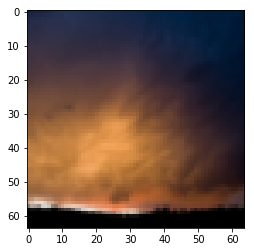

In [8]:
index=0
plt.imshow(train_x[index])
print("Y = [",str(train_y[0,index]),"]", " This is a",classes[train_y[0,index]].decode("utf-8"), "picture")

### **2. Data preprocessing**

<b> flatten the images </b>

In [9]:
train_x_flatten = train_x.reshape(train_x.shape[0],-1).T

In [10]:
train_x_flatten.shape

(12288, 209)

In [11]:
test_x_flatten = test_x.reshape(test_x.shape[0],-1).T

In [12]:
test_x_flatten.shape

(12288, 50)

<b> normalize data </b>

In [13]:
train_x = train_x_flatten/255
test_x = test_x_flatten/255

### 3. Helper functions

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [15]:
print(sigmoid(0))
print(sigmoid(10))

0.5
0.9999546021312976


In [16]:
def initilize_with_zero(dim):
    w = np.zeros(shape=(dim,1))
    b = 0
    #test for w's shape
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w, b

In [17]:
w,b = initilize_with_zero(3)
print("w = ",w)
print("b = ",b)

w =  [[0.]
 [0.]
 [0.]]
b =  0


In [18]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    # forward propagation
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z) # activation
    cost = (-1/m)*np.sum(Y * np.log(A) + (1-Y) * (np.log(1 - A)))
    
    # backward propagation
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {
        "dw" : dw,
        "db" : db
    }
    
    return grads,cost

In [19]:
w,b,X,Y = np.array([[2],[1],[3]]), 3, np.array([[1,2],[3,4],[5,6]]),np.array([0,1])

In [20]:
grads, cost = propagate(w,b,X,Y)
print('dw: ', grads['dw'])
print('db: ', grads['db'])
print('cost ', cost)

dw:  [[0.5]
 [1.5]
 [2.5]]
db:  0.49999999994856337
cost  11.499999970631707


In [21]:
def optimize(w, b, X, Y, num_iteration,learning_rate, print_cost=False):
    costs = []
    for i in range(num_iteration):
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i%100 == 0:
            costs.append(cost)
        
        
        if print_cost and i%100 == 0:
            print("Cost after %i iteration is: %f" % (i,cost))
            
    params = {
        "w": w,
        "b": b
    }
    grads = {
        "dw": dw,
        "db": db
    }
    
    return params,grads,costs

In [22]:
params,grads,costs = optimize(w,b,X,Y,num_iteration=1000,learning_rate=0.001, print_cost=True)

Cost after 0 iteration is: 11.500000
Cost after 100 iteration is: 10.600000
Cost after 200 iteration is: 9.700000
Cost after 300 iteration is: 8.800000
Cost after 400 iteration is: 7.900000
Cost after 500 iteration is: 7.000001
Cost after 600 iteration is: 6.100005
Cost after 700 iteration is: 5.200032
Cost after 800 iteration is: 4.300200
Cost after 900 iteration is: 3.401264


In [23]:
print('Parameters: ',params['w'])
print('bias is: ',params['b'])

Parameters:  [[ 1.50024981]
 [-0.49931624]
 [ 0.50111771]]
bias is:  2.5002169762376334


In [24]:
def predict(w,b,X):
    m = X.shape[1]
    predictions = np.zeros(shape= (1,m))
    A = sigmoid(np.dot(w.T,X)+b)
    
    #convert to probabilities 
    for i in range(m):
        predictions[0,i] = 1 if A[0,i] > 0.5 else 0
    
    assert(predictions.shape==(1,m))
    
    return predictions

In [25]:
predict(w,b,np.array([[2,3,4,5],[6,2,3,4],[4,5,6,7]]))

array([[1., 1., 1., 1.]])

### 4. Model

In [26]:
def model(train_x,train_y,test_x,test_y,num_iteration=1000,learning_rate=0.001, print_cost=False):
    w,b = initilize_with_zero(train_x.shape[0])
    
    params, grads, cost = optimize(w,b,train_x,train_y,num_iteration=num_iteration,learning_rate=learning_rate, print_cost=print_cost)
    
    w = params['w']
    b = params['b']
    
    predictions_train = predict(w,b,train_x)
    predictions_test = predict(w,b,test_x)
    
    print("Train accuracy: {} %".format(100 - np.mean(np.abs(predictions_train - train_y)) * 100))
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(predictions_test - test_y)) * 100))
    
    d = {
        "cost": cost,
        "w":w,
        "b":b,
        "predictions_train":predictions_train,
        "predictions_test":predictions_test,
        "num_iteration":num_iteration,
        "learning_rate":learning_rate
    }
    
    return d

In [27]:
d=model(train_x,train_y,test_x,test_y,num_iteration=1000,learning_rate=0.001, print_cost=True)

Cost after 0 iteration is: 0.693147
Cost after 100 iteration is: 0.591289
Cost after 200 iteration is: 0.555796
Cost after 300 iteration is: 0.528977
Cost after 400 iteration is: 0.506881
Cost after 500 iteration is: 0.487880
Cost after 600 iteration is: 0.471108
Cost after 700 iteration is: 0.456046
Cost after 800 iteration is: 0.442350
Cost after 900 iteration is: 0.429782
Train accuracy: 86.60287081339713 %
Test accuracy: 62.0 %


** example from test set**

y =  1 , I predicted this to be  non-cat


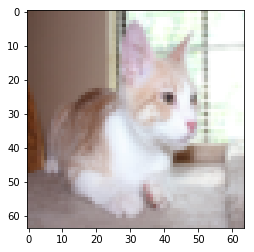

In [28]:
index = 4
plt.imshow(test_x[:,index].reshape(64,64,3))
print("y = ",str(test_y[0,index]),", I predicted this to be ",classes[int(d['predictions_test'][0,index])].decode("utf-8"))

#### cost functions

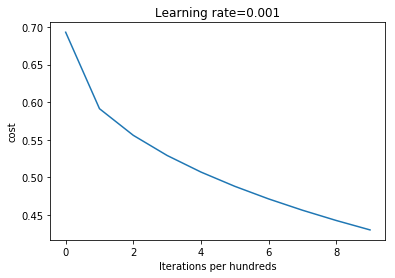

In [29]:
costs = d['cost']
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('Iterations per hundreds')
plt.title('Learning rate='+str(d['learning_rate']))
plt.show()

### 3. Further analysis

**Different learning rates**

learning rate is: 0.01
Train accuracy: 98.56459330143541 %
Test accuracy: 70.0 %

-----------------------------

learning rate is: 0.001
Train accuracy: 86.60287081339713 %
Test accuracy: 62.0 %

-----------------------------

learning rate is: 0.0001
Train accuracy: 66.02870813397129 %
Test accuracy: 36.0 %

-----------------------------



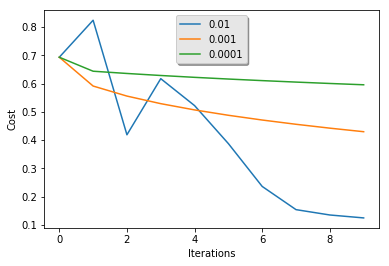

In [30]:
learning_rates = [0.01,0.001,0.0001]
models = {}

for i in learning_rates:
    print ('learning rate is: ' + str(i))
    models[str(i)]=model(train_x,train_y,test_x,test_y,num_iteration=1000,learning_rate=i, print_cost=False)
    print('\n' + '-----------------------------' + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['cost']), label=str(models[str(i)]['learning_rate']))
    
plt.xlabel('Iterations')
plt.ylabel('Cost')

legend = plt.legend(loc='upper center',shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**custom image**

y=  1 , predicted is: " cat " picture


C:\Users\rakulha\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


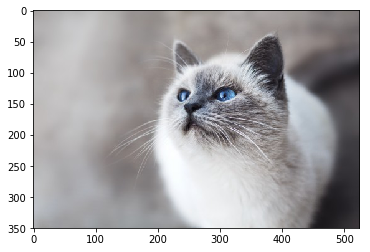

In [52]:
custom_img = 'Data/img.jpg'
image = np.array(plt.imread(custom_img))
image_t = transform.resize(image,output_shape=(64,64)).reshape(1,64*64*3).T
pred = predict(d['w'],d['b'],image_t)

plt.imshow(image)
print('y= ',str(int(np.squeeze(pred))),", predicted is: \"",classes[int(np.squeeze(pred)),].decode("utf-8"),"\" picture")